# Build a Text classification model using the below dataset. Upload the python html solution below.

# Sentiment is the output column. Do all the data cleaning process.

# Corona_NLP_train.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the data (assuming the data is provided in a csv file)
data = pd.read_csv('./Corona.csv',encoding='latin1')

df = pd.DataFrame(data)

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [3]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [4]:
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [5]:
df.drop(41156, inplace=True)

In [6]:
df['Location'].value_counts()

London                           540
United States                    528
London, England                  520
New York, NY                     395
Washington, DC                   373
                                ... 
Uganda Kampala                     1
Views don't reflect employers      1
Charlotte, MI                      1
East Midlands, UK                  1
OHIO                               1
Name: Location, Length: 12219, dtype: int64

In [7]:
mode_location = df['Location'].mode()[0]
df['Location'].fillna(mode_location, inplace=True)

In [8]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41151,44950,89902,London,14-04-2020,@MrSilverScott you are definitely my man. I fe...,Extremely Positive
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,London,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,London,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive


In [9]:
df['Location'].value_counts()

London                           9130
United States                     528
London, England                   520
New York, NY                      395
Washington, DC                    373
                                 ... 
Uganda Kampala                      1
Views don't reflect employers       1
Charlotte, MI                       1
East Midlands, UK                   1
OHIO                                1
Name: Location, Length: 12219, dtype: int64

In [10]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [11]:
df["Sentiment"].value_counts()

Positive              11422
Negative               9916
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [12]:
# Create a mapping for sentiment labels
sentiment_mapping = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0,
    'Extremely Positive': 2,
    'Extremely Negative': -2
}

# Map the sentiment labels to numerical values
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)


In [13]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,London,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,London,16-03-2020,"Me, ready to go at supermarket during the #COV...",-2
...,...,...,...,...,...,...
41151,44950,89902,London,14-04-2020,@MrSilverScott you are definitely my man. I fe...,2
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,0
41153,44952,89904,London,14-04-2020,Response to complaint not provided citing COVI...,-2
41154,44953,89905,London,14-04-2020,You know itÂs getting tough when @KameronWild...,1


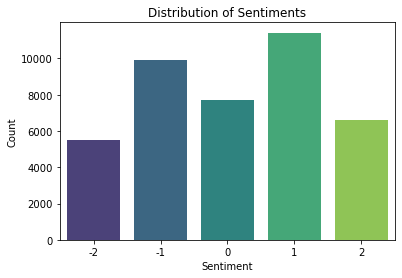

In [14]:
# Create a count plot for the 'Sentiment' column
sns.countplot(x='Sentiment', data=df, palette='viridis')

# Set labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Display the plot
plt.show()

In [15]:
df["Sentiment"].value_counts()

 1    11422
-1     9916
 0     7713
 2     6624
-2     5481
Name: Sentiment, dtype: int64

In [16]:
df = df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis=1)

In [17]:
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,advice Talk to your neighbours family to excha...,1
2,Coronavirus Australia: Woolworths to give elde...,1
3,My food stock is not the only one which is emp...,1
4,"Me, ready to go at supermarket during the #COV...",-2
...,...,...
41151,@MrSilverScott you are definitely my man. I fe...,2
41152,Airline pilots offering to stock supermarket s...,0
41153,Response to complaint not provided citing COVI...,-2
41154,You know itÂs getting tough when @KameronWild...,1


In [18]:
df['OriginalTweet'][0]

'@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'

In [19]:
df['OriginalTweet'][10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [20]:
import re

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)  # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)  # Remove hashtags
    return tweet.strip()

df['OriginalTweet'] = df['OriginalTweet'].apply(clean_tweet)

In [21]:
df['OriginalTweet'][0]

'and  and'

In [22]:
df['OriginalTweet'][10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket."

In [23]:
X=df['OriginalTweet'].values
Y=df['Sentiment'].values
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
vec.fit(X_train)
x_train=vec.transform(X_train)
x_test=vec.transform(X_test)

In [25]:
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(df['OriginalTweet'])
y = df['Sentiment']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.55      0.38      0.45      1073
          -1       0.42      0.48      0.45      2000
           0       0.67      0.34      0.45      1532
           1       0.41      0.59      0.48      2287
           2       0.55      0.45      0.50      1340

    accuracy                           0.47      8232
   macro avg       0.52      0.45      0.47      8232
weighted avg       0.50      0.47      0.47      8232

